In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Логистическая регрессия
# Более глубокий метод анализа номинативных переменных по сравнению с линейной регрессией
# Популярный метод - бинарная классификация
# Зависимая переменная - две градации - представляется через линейную комбинацию предикторов

In [ ]:
# Та или иная градация возможная с некоторой степенью вероятности p
# Что p связать с предикторами на диапазоне (-беск, +беск), то понятие логарифма шанса
# odds - шансы odds = p/(1-p) -> +беск
# log odds -> -беск

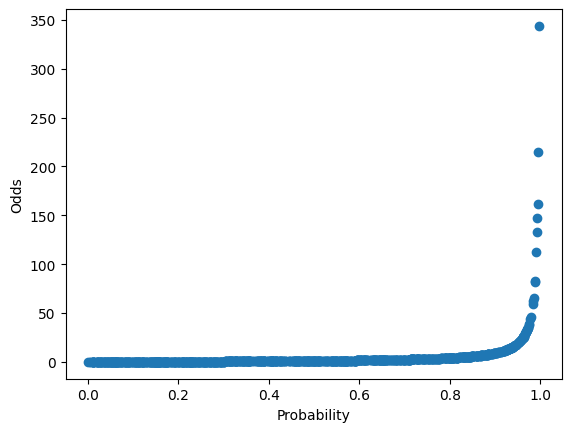

In [16]:
# график шансов и вероятности
p = [np.random.rand() for _ in range(1000)]
odds = [p_i/(1-p_i) for p_i in p]
plt.xlabel('Probability')
plt.ylabel('Odds')
plt.scatter(p, odds);

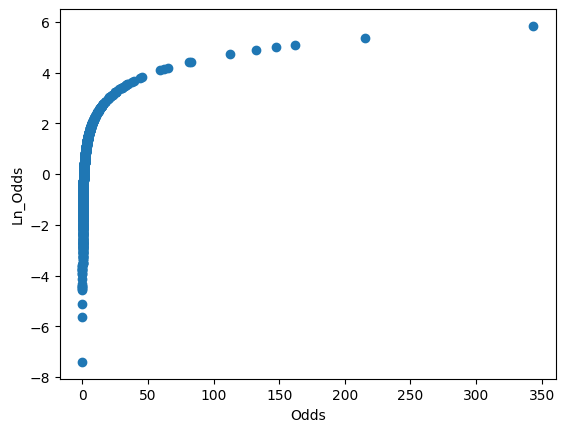

In [20]:
# сделали "вероятность" от - беск до +беск
ln_odds = [np.log(i) for i in odds]
plt.xlabel('Odds')
plt.ylabel('Ln_Odds')
plt.scatter(odds, ln_odds);

In [27]:
df = pd.read_csv('titanic.csv', delimiter=';')
df

,survived,name,sex,age
0,0,Mr. Owen Harris Braund,male,22.0
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0
2,1,Miss. Laina Heikkinen,female,26.0
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0
4,0,Mr. William Henry Allen,male,35.0
...,...,...,...,...
882,0,Rev. Juozas Montvila,male,27.0
883,1,Miss. Margaret Edith Graham,female,19.0
884,0,Miss. Catherine Helen Johnston,female,7.0
885,1,Mr. Karl Howell Behr,male,26.0


In [ ]:
#stats.formula.api помогает сделать линейную регрессию
#GLM являются расширением модели линейной регрессии и используются, 
# когда переменная ответа не имеет нормального распределения или имеет нелинейную связь с переменными-предикторами.
# обобщенная регрессия линейной модели
print(df.survived.value_counts())
intercept = np.log(342/545)
print(intercept)
glm_binom2 = smf.glm(formula="survived ~ 1",
                     data=df, family=sm.families.Binomial()) # создали модель
# "survived ~ 1" - нет предикторов
# family = sm.families.Binomial() позволяет работать с бинарной зависимой переменной
model = glm_binom2.fit() # производим расчёт
p = np.exp(intercept) / (1 + np.exp(intercept))
print(np.log(p/(1-p)))
model.summary()

survived
0    545
1    342
Name: count, dtype: int64
-0.46597505760063884
-0.46597505760063884


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                  887
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -591.38
Date:                Tue, 13 May 2025   Deviance:                       1182.8
Time:                        12:50:20   Pearson chi2:                     887.
No. Iterations:                     4   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4660      0.069     -6.755      0.000      -0.601      -0.331
==============================================================================
"""